In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings 
warnings.filterwarnings('ignore')

# XGBoost

- xgboost는 사이킷런에서 제공하지 않기 때문에 별도의 설치과정이 필요하다.
- https://xgboost.readthedocs.io/en/latest/build.html (공식 문서 영문)를 참고하여 설치

- XGBoost는 GBM(Gradient Boosting)의 결정 트리를 구성할 때 병렬 처리를 사용하여, 수행시간을 GBM에 비해 훨씬 단축시켰다.

In [2]:
import xgboost as xgb

model = xgb.XGBClassifier()

### XGboost의 파라미터
- XGboost의 경우에는 파라미터를 3개의 범주로 나눈다. 일반적인 파라미터(General parameters), 부스터 파라미터(Booster parameters), 학습 과정 파라미터(Learning Task parameters)로 구성 되어있다.  

#### General parameters
- booster : 어떤 부스터 구조를 쓸 것인지 정하는 파라미터이다. gbtree(결정트리), gblinear(선형모델), dart(Drop out Regression Trees)가 있고 기본값은 'gbtree'이다, gbtree의 성능이 제일 낫다.  
- n_jobs : xgboost를 실행시 병렬처리에 사용되는 코어 수, 따로 값을 주지 않으면 자동적으로 코어를 탐지하여 사용.  
- num_feature : 특성의 수를 정해줘야 하는 경우에 사용.  

#### Booster parameters
- learning_rate : 가중치를 정해주는 파라미터이다.    
- gamma : 트리가 분할을 할 때 필요한 최소 손실 감소(Minimum Loss reduction)를 지정해준다, 값이 커지면 트리의 깊이가 줄어들어 보수적인 모델이 된다.  
- max_depth : 트리의 깊이를 정해주는 파라미터  
- reg_lambda : L2 norm. 값이 커질수록 모델이 보수적으로 변한다.  
- reg_alpha : L1 norm. 값이 커질수록 모델이 보수적으로 변한다.  

#### Learning Task parameters
- objective : 목적함수를 정해주는 파라미터이다.  
    - binary:logistic는 이진분류, multi:softmax는 softmax는 다중 클래스 분류이다. 이 외에도 multi:softprob , rank:map 등 다양한 값들이 존재한다.  
- eval_metric : 모델의 평가 함수를 설정하는 파라미터로 회귀분석이면 'rmse', 분류 문제에는 'error'를 기본값으로 사용한다, objective에 따라 기본값이 설정되어 있다.  
    - rmse(root mean square error), mae(mean absolute error), error(Binary classification error rate) 등 여러 값들이 존재한다.  

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [4]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1).fit(X_train, y_train)

In [12]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
xgb_model.objective

'binary:logistic'

- 직접 만든 모델의 파라미터 설정을 확인할 수 있다.
- 유방암 데이터의 y값은 0과 1로 되어있어 objective가 binary:logist로 자동으로 설정되어 있는 것을 볼 수 있다.

In [6]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 0.9899497487437185
test score : 0.9766081871345029


In [13]:
xgb_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
xgb_model.predict_proba(X_test)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_early_stopping_attr',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_ntree_limit',
 'best_score',
 'booster',
 'callbacks',
 'classes_',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsampl

<BarContainer object of 30 artists>

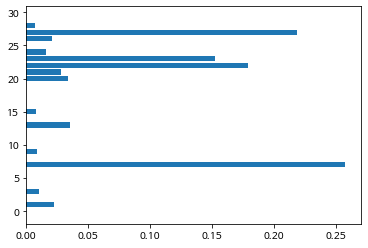

In [27]:
plt.barh(y=range(len(xgb_model.feature_importances_)), width=xgb_model.feature_importances_)

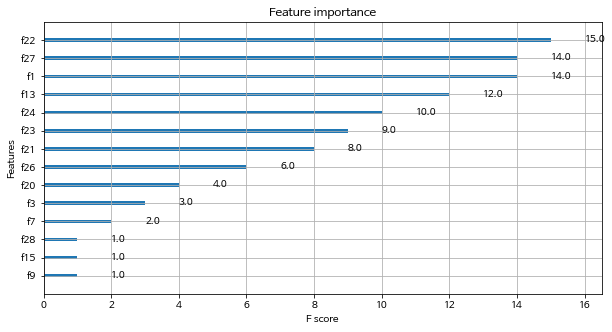

In [28]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- xgboost의 plot_importance로 모델이 어떤 특성에 의존하고 있는지를 확인할 수 있다 또한 직접 만든 데이터의 경우 특성들이 유효한지 확인해 볼 수도 있다.

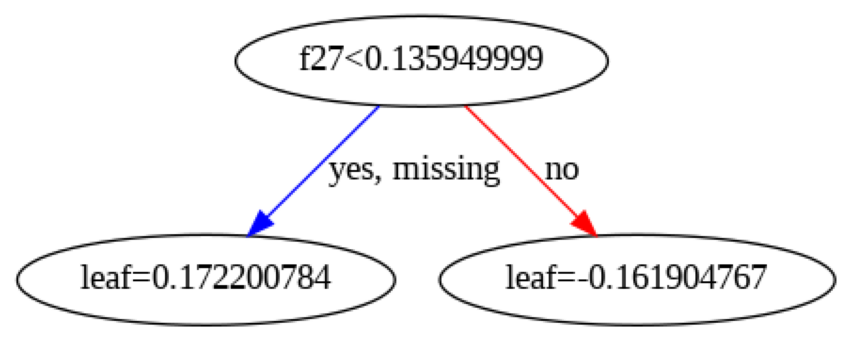

In [29]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize = (15, 10))
plot_tree(xgb_model, ax = ax)
plt.show()

- plot_tree를 이용해서 트리를 시각화할 수 있다.

In [30]:
from sklearn.datasets import load_wine

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [ ]:
print(wine['DESCR'])

In [41]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree',
                             learning_rate = 0.1,
                             max_depth=1,
                             n_estimators=100).fit(X_train, y_train)

In [42]:
xgb_model.objective

'multi:softprob'

- 유방암 데이터와는 다르게 와인데이터에는 0, 1, 2의 y값을 가진다 따라서 xgboost모델은 자동적으로 objective = 'multi:softporb'으로 되어있는 것을 확인할 수 있다.

In [43]:
print('train score : {}'.format(xgb_model.score(X_train, y_train)))
print('test score : {}'.format(xgb_model.score(X_test, y_test)))

train score : 1.0
test score : 0.9814814814814815


In [44]:
xgb_model.predict(X_test)

array([0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1,
       0, 2, 0, 2, 0, 2, 2, 1, 2, 2])

In [ ]:
xgb_model.predict_proba(X_test)

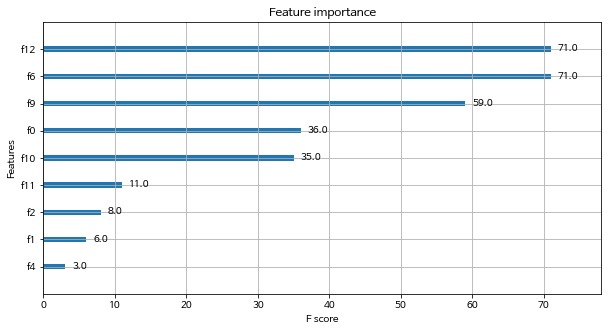

In [46]:
fig, ax = plt.subplots(figsize = (10, 5))
plot_importance(xgb_model, ax = ax)
plt.show()

- 어떤 특성들이 유효한지 확인할 수 있다.

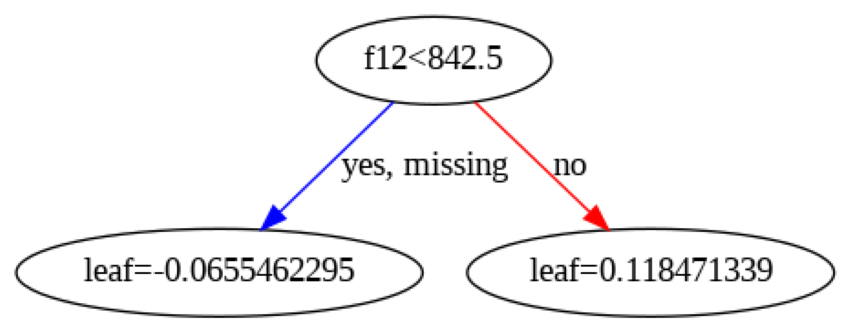

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(xgb_model, ax=ax)
plt.show()